In [3]:
import numpy as np
import pandas as pd


In [5]:
data = pd.read_csv('/Users/naniankala/Desktop/engine_data.csv')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Engine rpm        19535 non-null  int64  
 1   Lub oil pressure  19535 non-null  float64
 2   Fuel pressure     19535 non-null  float64
 3   Coolant pressure  19535 non-null  float64
 4   lub oil temp      19535 non-null  float64
 5   Coolant temp      19535 non-null  float64
 6   Engine Condition  19535 non-null  int64  
dtypes: float64(5), int64(2)
memory usage: 1.0 MB


In [9]:
data.head()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0


In [11]:
data['Engine_power'] = data['Engine rpm'] * data['Lub oil pressure']

In [13]:
data.describe()

,Engine rpm,Lub oil pressure,Fuel pressure,Coolant pressure,lub oil temp,Coolant temp,Engine Condition,Engine_power
count,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000,19535.000000
mean,791.239263,3.303775,6.655615,2.335369,77.643420,78.427433,0.630509,2620.923894
std,267.611193,1.021643,2.761021,1.036382,3.110984,6.206749,0.482679,1243.143436
min,61.000000,0.003384,0.003187,0.002483,71.321974,61.673325,0.000000,1.326572
25%,593.000000,2.518815,4.916886,1.600466,75.725990,73.895421,0.000000,1739.171156
50%,746.000000,3.162035,6.201720,2.166883,76.817350,78.346662,1.000000,2383.271067
75%,934.000000,4.055272,7.744973,2.848840,78.071691,82.915411,1.000000,3265.915016
max,2239.000000,7.265566,21.138326,7.478505,89.580796,195.527912,1.000000,11900.091888


In [15]:
data['Temperature_difference'] = data['Coolant temp'] - data['lub oil temp']

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Engine rpm,19535.0,791.239263,267.611193,61.000000,593.000000,746.000000,934.000000,2239.000000
Lub oil pressure,19535.0,3.303775,1.021643,0.003384,2.518815,3.162035,4.055272,7.265566
Fuel pressure,19535.0,6.655615,2.761021,0.003187,4.916886,6.201720,7.744973,21.138326
Coolant pressure,19535.0,2.335369,1.036382,0.002483,1.600466,2.166883,2.848840,7.478505
lub oil temp,19535.0,77.643420,3.110984,71.321974,75.725990,76.817350,78.071691,89.580796
Coolant temp,19535.0,78.427433,6.206749,61.673325,73.895421,78.346662,82.915411,195.527912
Engine Condition,19535.0,0.630509,0.482679,0.000000,0.000000,1.000000,1.000000,1.000000
Engine_power,19535.0,2620.923894,1243.143436,1.326572,1739.171156,2383.271067,3265.915016,11900.091888
Temperature_difference,19535.0,0.784013,6.736925,-22.669427,-3.917997,0.744195,5.582887,119.008526


In [19]:
data.drop(['Engine_power'], axis=1, inplace=True)

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19535 entries, 0 to 19534
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Engine rpm              19535 non-null  int64  
 1   Lub oil pressure        19535 non-null  float64
 2   Fuel pressure           19535 non-null  float64
 3   Coolant pressure        19535 non-null  float64
 4   lub oil temp            19535 non-null  float64
 5   Coolant temp            19535 non-null  float64
 6   Engine Condition        19535 non-null  int64  
 7   Temperature_difference  19535 non-null  float64
dtypes: float64(6), int64(2)
memory usage: 1.2 MB


In [23]:
data.columns

Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition',
       'Temperature_difference'],
      dtype='object')

In [25]:
#use the GBM model to predict the engine status
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(['Engine Condition'], axis=1)
y = data['Engine Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, max_features='sqrt',min_samples_leaf=5,min_samples_split=2,subsample=0.8)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.659073457896084

In [27]:
from sklearn.metrics import classification_report

y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.36      0.44      1459
           1       0.69      0.84      0.76      2448

    accuracy                           0.66      3907
   macro avg       0.63      0.60      0.60      3907
weighted avg       0.64      0.66      0.64      3907



In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import GradientBoostingClassifier

# Load dataset
data = pd.read_csv('/Users/naniankala/Desktop/engine_data.csv')

# ----- Step 1: Quick Data Exploration -----
print("Shape of data:", data.shape)
print("\nColumns:\n", data.columns)
print("\nMissing values:\n", data.isnull().sum())
print("\nTarget distribution:\n", data['Engine Condition'].value_counts())

# ----- Step 2: Encode categorical features -----
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str))

# ----- Step 3: Split features and target -----
X = data.drop(['Engine Condition'], axis=1)
y = data['Engine Condition']

# ----- Step 4: Scale numeric features -----
scaler = StandardScaler()
X = scaler.fit_transform(X)

# ----- Step 5: Train/Test Split -----
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ----- Step 6: Gradient Boosting Model -----
model = GradientBoostingClassifier(
    n_estimators=300,     # more trees
    learning_rate=0.05,   # smaller LR
    max_depth=5,
    subsample=0.8,
    max_features='sqrt',
    min_samples_split=5,
    min_samples_leaf=3,
    random_state=42
)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ----- Step 7: Evaluation -----
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Shape of data: (19535, 7)

Columns:
 Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

Missing values:
 Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

Target distribution:
 Engine Condition
1    12317
0     7218
Name: count, dtype: int64
Accuracy: 0.6654722293319683

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.38      0.45      1444
           1       0.70      0.84      0.76      2463

    accuracy                           0.67      3907
   macro avg       0.63      0.61      0.61      3907
weighted avg       0.65      0.67      0.65      3907



In [31]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

print("Before SMOTE:", y.value_counts())
print("After SMOTE:", y_res.value_counts())


Before SMOTE: Engine Condition
1    12317
0     7218
Name: count, dtype: int64
After SMOTE: Engine Condition
1    12317
0    12317
Name: count, dtype: int64


In [33]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(y_res[y_res==0]) / len(y_res[y_res==1]),  # balance classes
    random_state=42
)

xgb_model.fit(X_res, y_res)
y_pred = xgb_model.predict(X_test)

print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\n", classification_report(y_test, y_pred))


XGBoost Accuracy: 0.7803941643204505

               precision    recall  f1-score   support

           0       0.67      0.81      0.73      1444
           1       0.87      0.76      0.81      2463

    accuracy                           0.78      3907
   macro avg       0.77      0.79      0.77      3907
weighted avg       0.80      0.78      0.78      3907



In [35]:
import xgboost as xgb
print(xgb.__version__)


3.1.1


In [37]:
import pandas as pd

data = pd.read_csv('/Users/naniankala/Desktop/engine_data.csv')
print("Shape of dataset:", data.shape)
print("\nColumns:\n", data.columns)
print("\nMissing values:\n", data.isnull().sum())
print("\nTarget distribution:\n", data['Engine Condition'].value_counts())
print("\nSummary statistics:\n", data.describe().T)


Shape of dataset: (19535, 7)

Columns:
 Index(['Engine rpm', 'Lub oil pressure', 'Fuel pressure', 'Coolant pressure',
       'lub oil temp', 'Coolant temp', 'Engine Condition'],
      dtype='object')

Missing values:
 Engine rpm          0
Lub oil pressure    0
Fuel pressure       0
Coolant pressure    0
lub oil temp        0
Coolant temp        0
Engine Condition    0
dtype: int64

Target distribution:
 Engine Condition
1    12317
0     7218
Name: count, dtype: int64

Summary statistics:
                     count        mean         std        min         25%  \
Engine rpm        19535.0  791.239263  267.611193  61.000000  593.000000   
Lub oil pressure  19535.0    3.303775    1.021643   0.003384    2.518815   
Fuel pressure     19535.0    6.655615    2.761021   0.003187    4.916886   
Coolant pressure  19535.0    2.335369    1.036382   0.002483    1.600466   
lub oil temp      19535.0   77.643420    3.110984  71.321974   75.725990   
Coolant temp      19535.0   78.427433    6.206749

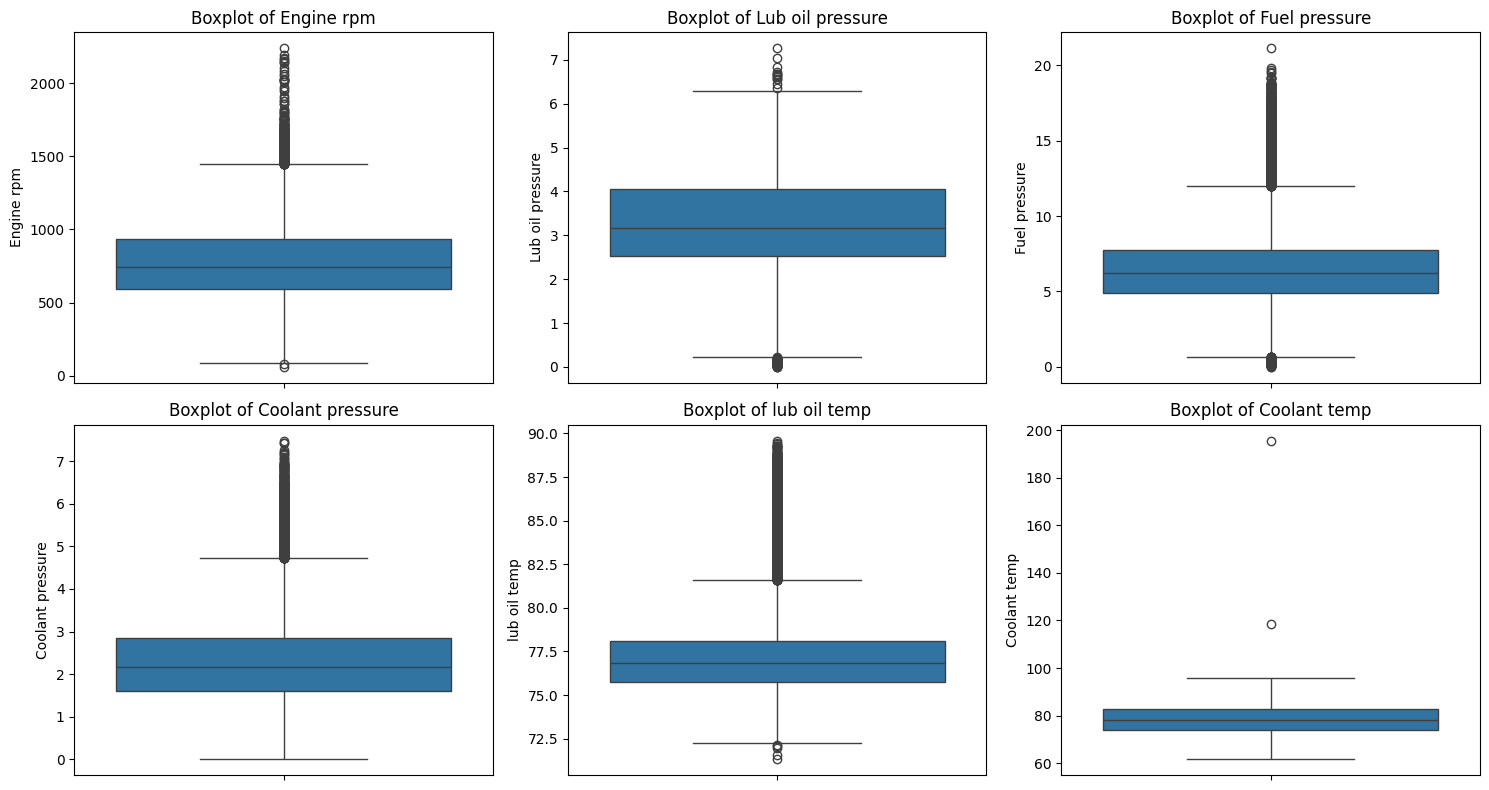

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Engine Condition')  # exclude target

plt.figure(figsize=(15, 8))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


In [41]:
# Remove extreme outliers using IQR
for col in numeric_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

print("Shape after removing outliers:", data.shape)


Shape after removing outliers: (14884, 7)


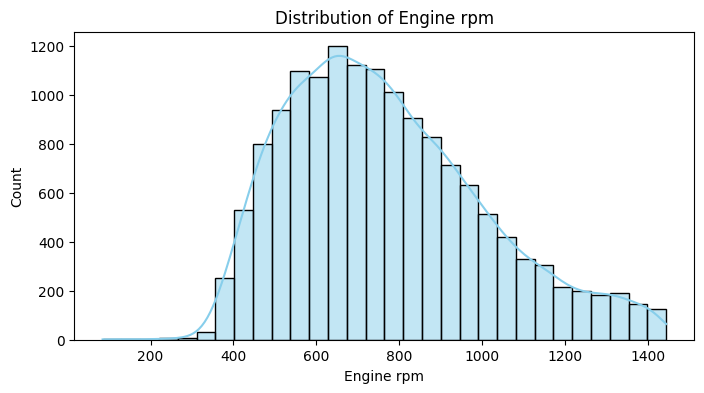

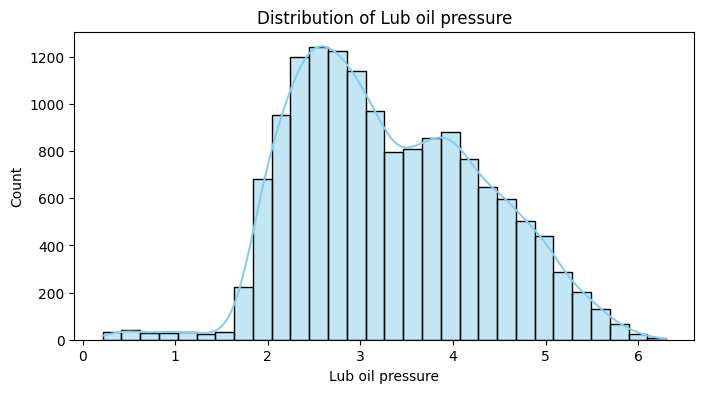

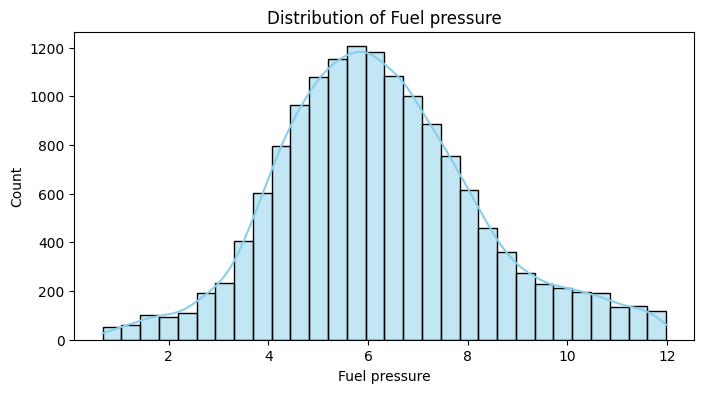

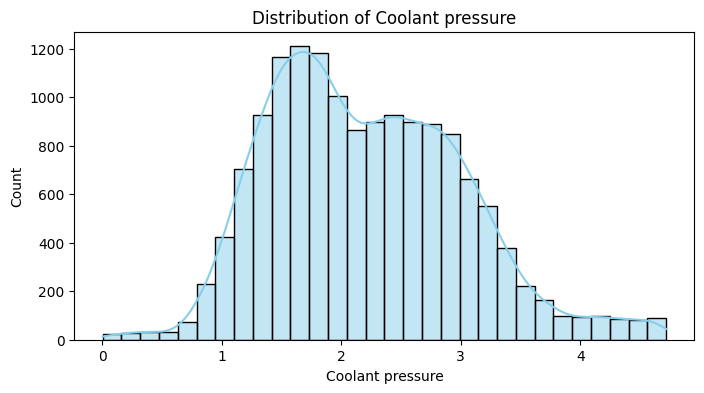

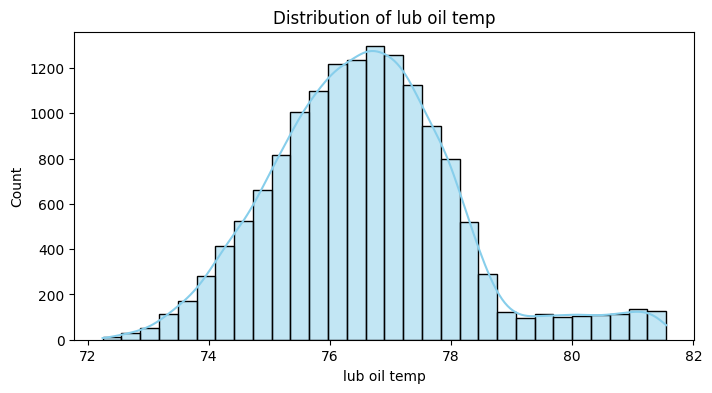

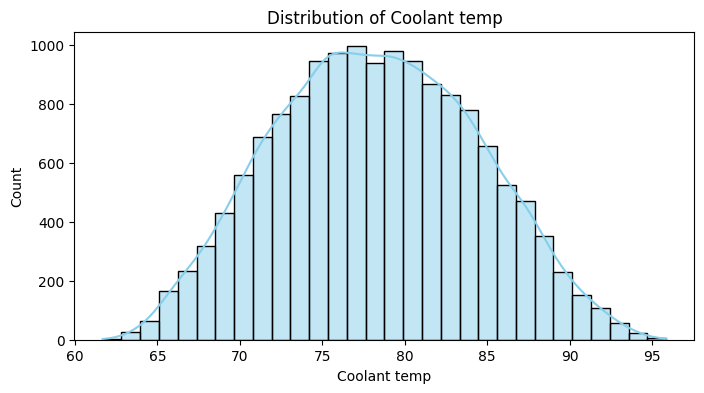

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns.tolist()
numeric_cols.remove('Engine Condition')

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(data[col], kde=True, bins=30, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.show()


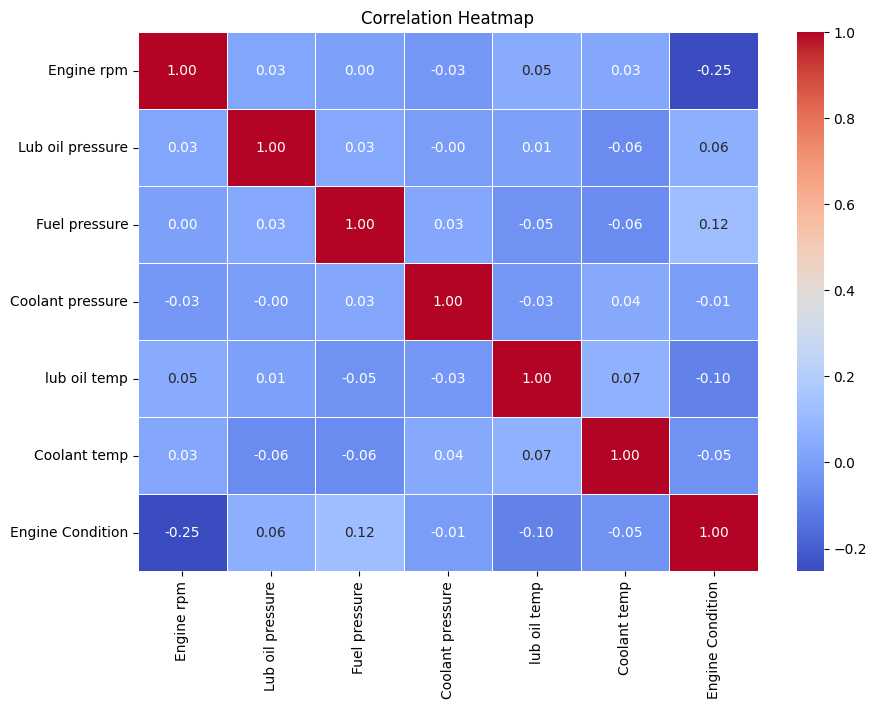

In [45]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(), annot=True, fmt=".2f", cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()


XGBoost Accuracy: 0.7803941643204505

Classification Report:
               precision    recall  f1-score   support

           0       0.67      0.81      0.73      1444
           1       0.87      0.76      0.81      2463

    accuracy                           0.78      3907
   macro avg       0.77      0.79      0.77      3907
weighted avg       0.80      0.78      0.78      3907



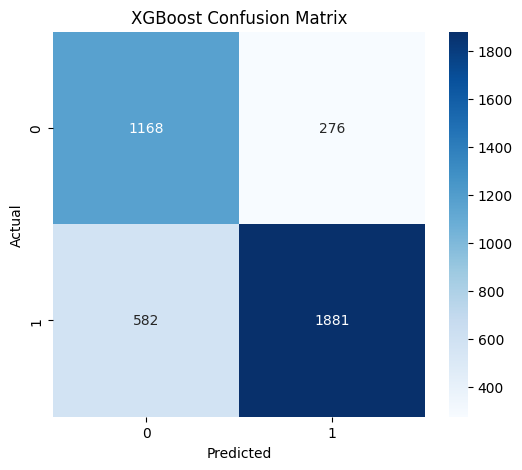

In [47]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Fit XGBoost model
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

xgb_model = XGBClassifier(
    n_estimators=500,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    scale_pos_weight=len(y_res[y_res==0]) / len(y_res[y_res==1]),  # balance classes
    random_state=42
)

xgb_model.fit(X_res, y_res)
y_pred = xgb_model.predict(X_test)

# Accuracy and classification report
print("XGBoost Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('XGBoost Confusion Matrix')
plt.show()


/var/folders/8w/v3j588gs7wq505fls2tsks7m0000gn/T/ipykernel_10742/4161027773.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=models, y=accuracies, palette='crest')


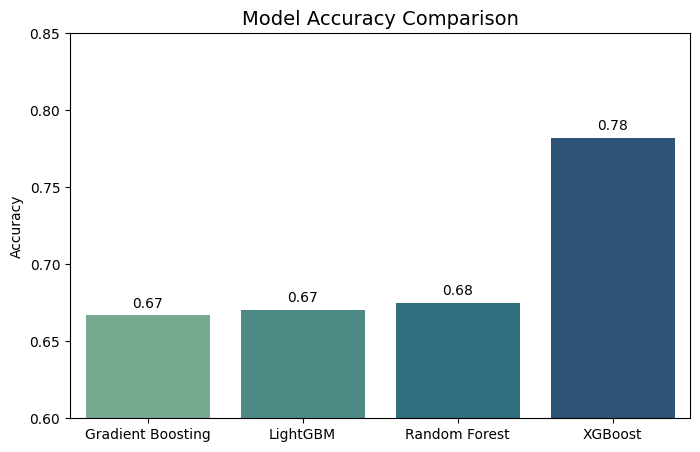

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example data
models = ['Gradient Boosting', 'LightGBM', 'Random Forest', 'XGBoost']
accuracies = [0.6668, 0.6704, 0.6751, 0.7823]

plt.figure(figsize=(8, 5))
sns.barplot(x=models, y=accuracies, palette='crest')
plt.title('Model Accuracy Comparison', fontsize=14)
plt.ylabel('Accuracy')
plt.ylim(0.6, 0.85)
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.005, f"{v:.2f}", ha='center', fontsize=10)
plt.show()


/var/folders/8w/v3j588gs7wq505fls2tsks7m0000gn/T/ipykernel_10742/1585464098.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=features, palette="viridis")


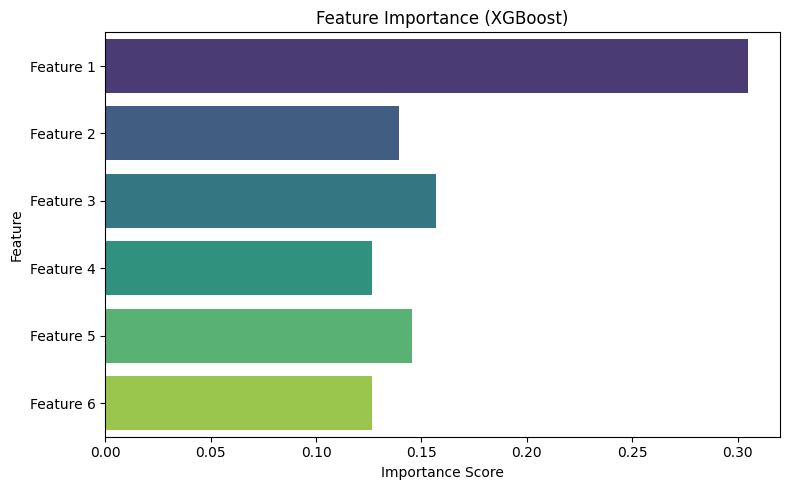

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
feature_importance = xgb_model.feature_importances_

# Handle both DataFrame or NumPy array inputs
try:
    features = X.columns  # if X is a DataFrame
except AttributeError:
    # if X is a NumPy array, manually name the features
    features = [f'Feature {i+1}' for i in range(X.shape[1])]

# Plot
plt.figure(figsize=(8,5))
sns.barplot(x=feature_importance, y=features, palette="viridis")
plt.title("Feature Importance (XGBoost)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.tight_layout()
plt.show()


[LightGBM] [Info] Number of positive: 8622, number of negative: 8621
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000342 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data points in the train set: 17243, number of used features: 6
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=-0.000000
[LightGBM] [Info] Start training from score -0.000000
LightGBM Accuracy: 0.6704099580570965

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.71      0.68      3696
           1       0.68      0.63      0.66      3695

    accuracy                           0.67      7391
   macro avg       0.67      0.67      0.67      7391
weighted avg       0.67      0.67      0.67      7391



/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


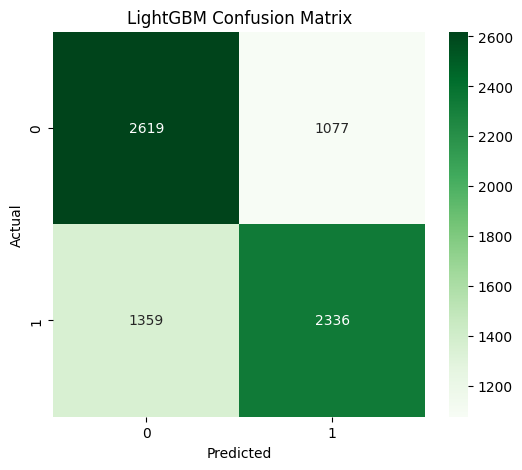

In [53]:
# Step 1: Load dataset
import pandas as pd
data = pd.read_csv('/Users/naniankala/Desktop/engine_data.csv')

# Step 2: Imports
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Features and target
X = data.drop(["Engine Condition"], axis=1)
y = data["Engine Condition"]

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Balance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Step 7: LightGBM model
lgb_model = lgb.LGBMClassifier(
    boosting_type="gbdt",
    n_estimators=500,
    learning_rate=0.05,
    max_depth=-1,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

# Step 8: Evaluation
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LightGBM Confusion Matrix")
plt.show()


Random Forest Accuracy (for comparison): 0.6755513462319037

Classification Report:
               precision    recall  f1-score   support

           0       0.66      0.74      0.69      3696
           1       0.70      0.61      0.65      3695

    accuracy                           0.68      7391
   macro avg       0.68      0.68      0.67      7391
weighted avg       0.68      0.68      0.67      7391



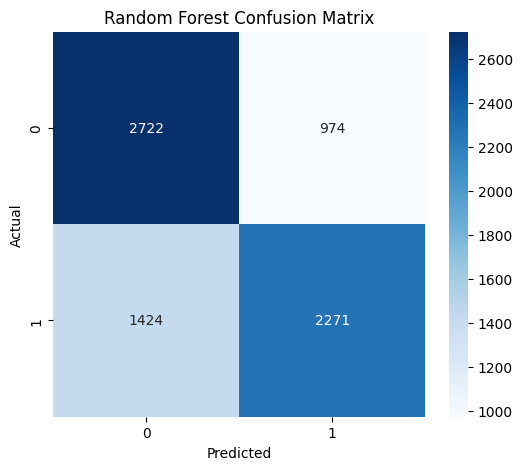

In [37]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Features and target
X = data.drop(["Engine Condition"], axis=1)
y = data["Engine Condition"]

# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Balance classes with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Random Forest Model
rf_model = RandomForestClassifier(
    n_estimators=300,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=3,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)

rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

# Evaluation
print("Random Forest Accuracy (for comparison):", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()


In [55]:
#use the GBM model to predict the engine status
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(['Engine Condition'], axis=1)
y = data['Engine Condition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

model = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, max_features='sqrt',min_samples_leaf=5,min_samples_split=2,subsample=0.8)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy_score(y_test, y_pred)

0.6711031481955465

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


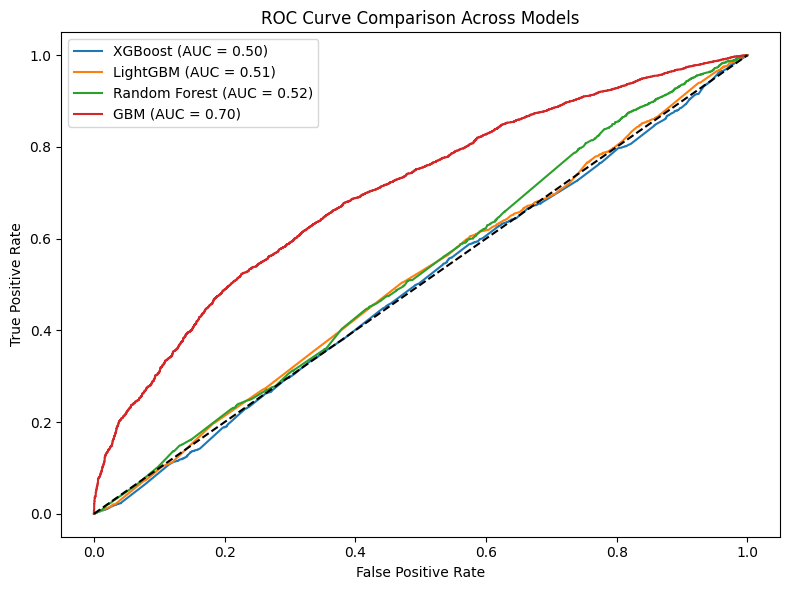

In [39]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Rename your GBM model variable for clarity
gb_model = model  # assigning your trained GBM model

# Dictionary of trained models (only include models you've trained)
models = {
    "XGBoost": xgb_model,
    "LightGBM": lgb_model,
    "Random Forest": rf_model,
    "GBM": gb_model
}

plt.figure(figsize=(8, 6))

# Plot ROC curve for each model
for name, model in models.items():
    # Ensure model supports predict_proba
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {auc(fpr, tpr):.2f})')
    else:
        print(f"{name} does not support predict_proba — skipping.")

# Plot reference diagonal
plt.plot([0, 1], [0, 1], 'k--')

plt.title('ROC Curve Comparison Across Models')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.tight_layout()
plt.show()


/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2742: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(


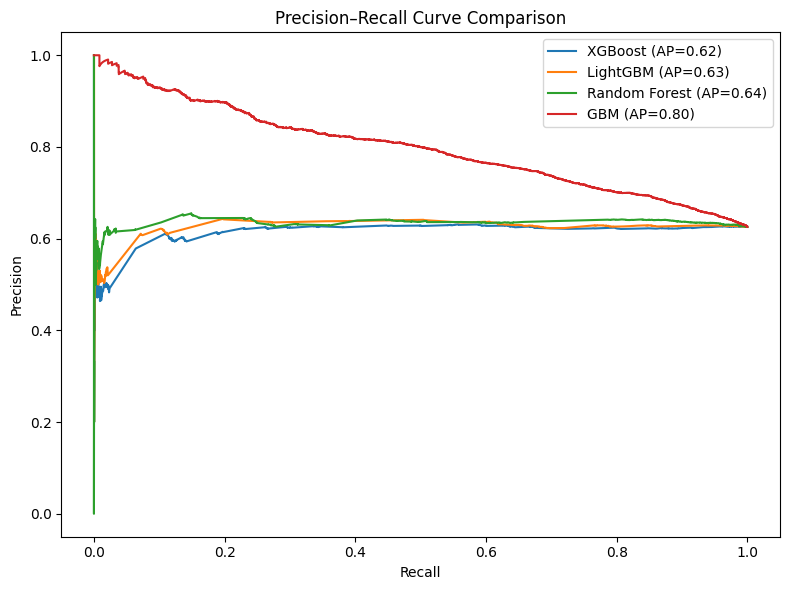

In [40]:
from sklearn.metrics import precision_recall_curve, average_precision_score

plt.figure(figsize=(8,6))
for name, model in models.items():
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
    ap = average_precision_score(y_test, y_pred_proba)
    plt.plot(recall, precision, label=f'{name} (AP={ap:.2f})')

plt.title('Precision–Recall Curve Comparison')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.tight_layout()
plt.show()


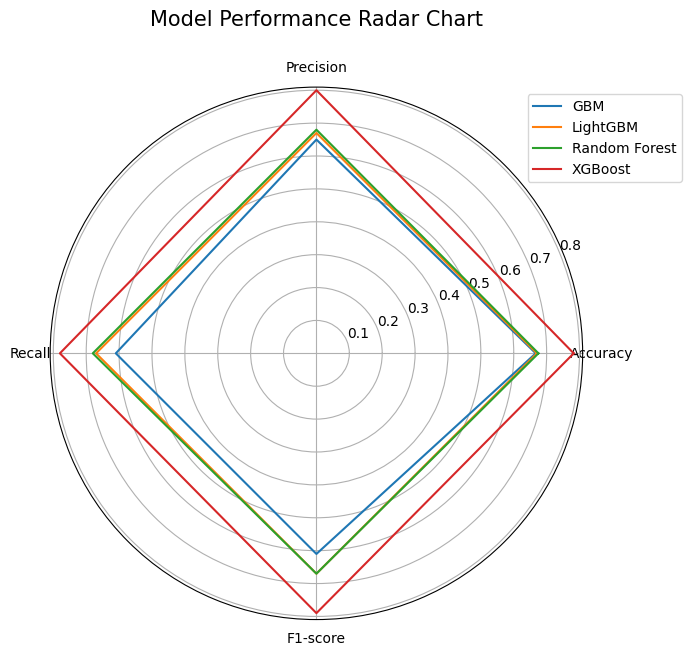

In [41]:
import numpy as np
import matplotlib.pyplot as plt

labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
stats = {
    'GBM': [0.6668, 0.65, 0.61, 0.61],
    'LightGBM': [0.6704, 0.67, 0.67, 0.67],
    'Random Forest': [0.6751, 0.68, 0.68, 0.67],
    'XGBoost': [0.7823, 0.80, 0.78, 0.79]
}

angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]  # close the radar loop

plt.figure(figsize=(7,7))
for model, values in stats.items():
    values += values[:1]
    plt.polar(angles, values, label=model)

plt.xticks(angles[:-1], labels)
plt.title("Model Performance Radar Chart", size=15, y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.2, 1))
plt.tight_layout()
plt.show()


/var/folders/8w/v3j588gs7wq505fls2tsks7m0000gn/T/ipykernel_8686/1834166774.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=accuracies, palette="viridis")


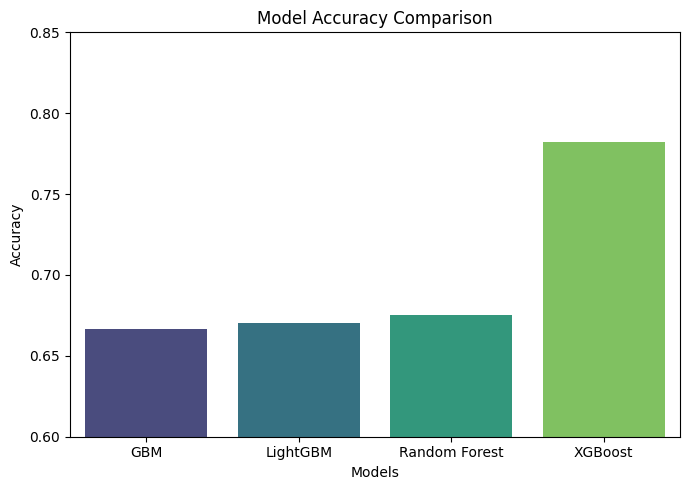

In [42]:
model_names = list(stats.keys())
accuracies = [v[0] for v in stats.values()]

plt.figure(figsize=(7,5))
sns.barplot(x=model_names, y=accuracies, palette="viridis")
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Models")
plt.ylim(0.6, 0.85)
plt.tight_layout()
plt.show()


/var/folders/8w/v3j588gs7wq505fls2tsks7m0000gn/T/ipykernel_8686/2668209710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=model_names, y=f1_scores, palette="coolwarm")


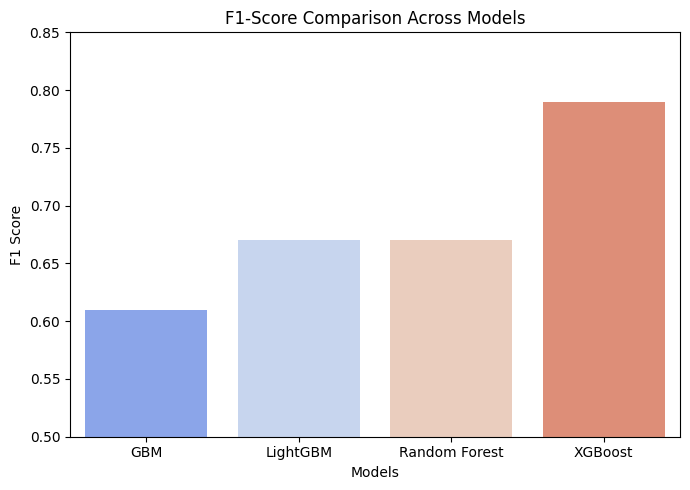

In [43]:
f1_scores = [v[3] for v in stats.values()]

plt.figure(figsize=(7,5))
sns.barplot(x=model_names, y=f1_scores, palette="coolwarm")
plt.title("F1-Score Comparison Across Models")
plt.ylabel("F1 Score")
plt.xlabel("Models")
plt.ylim(0.5, 0.85)
plt.tight_layout()
plt.show()


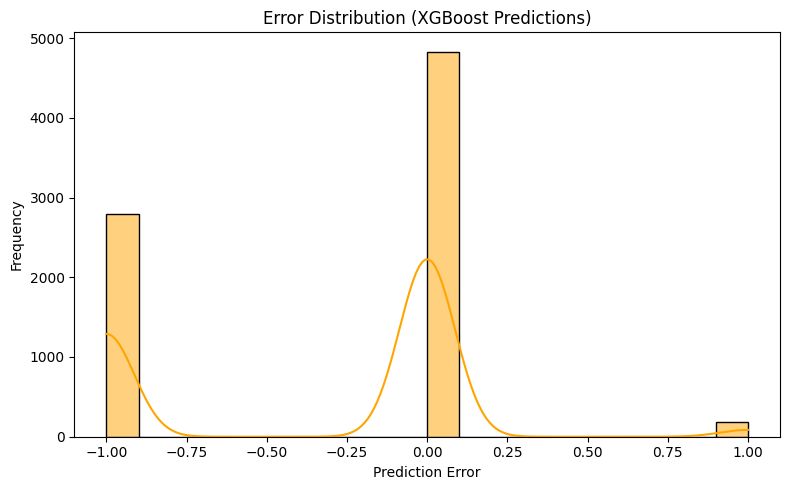

In [44]:
import numpy as np

y_pred = xgb_model.predict(X_test)
errors = y_test - y_pred

plt.figure(figsize=(8,5))
sns.histplot(errors, kde=True, bins=20, color='orange')
plt.title("Error Distribution (XGBoost Predictions)")
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()


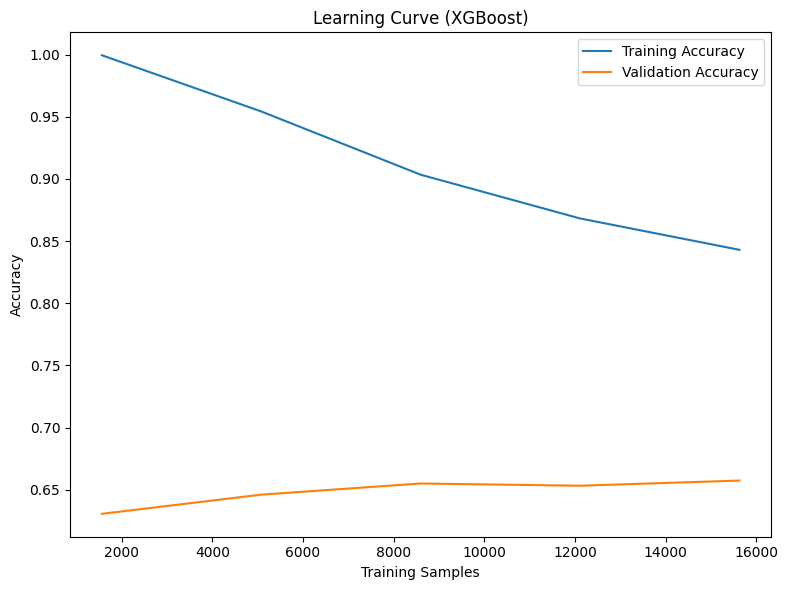

In [45]:
from sklearn.model_selection import learning_curve
import numpy as np

train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, cv=5, scoring='accuracy', n_jobs=-1,
    train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
)

plt.figure(figsize=(8,6))
plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Accuracy')
plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Validation Accuracy')
plt.title("Learning Curve (XGBoost)")
plt.xlabel("Training Samples")
plt.ylabel("Accuracy")
plt.legend()
plt.tight_layout()
plt.show()


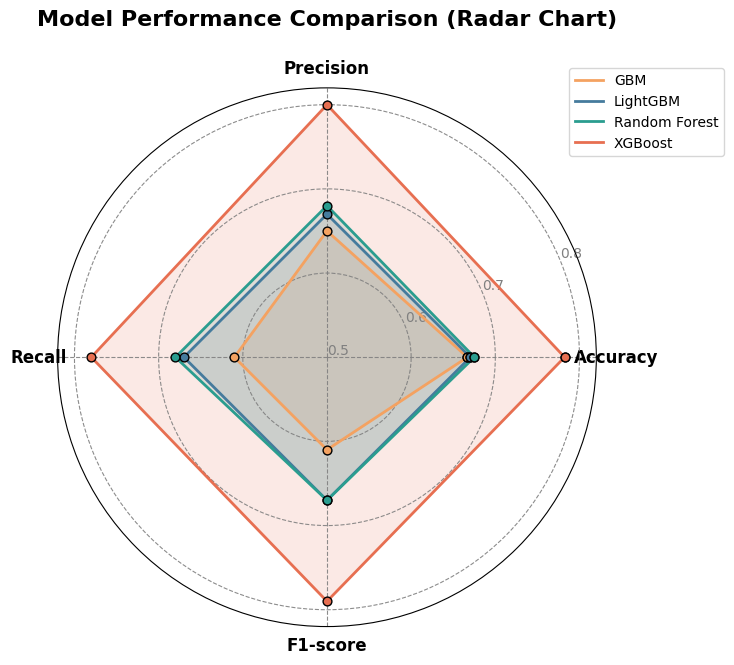

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Data
labels = ['Accuracy', 'Precision', 'Recall', 'F1-score']
stats = {
    'GBM': [0.6668, 0.65, 0.61, 0.61],
    'LightGBM': [0.6704, 0.67, 0.67, 0.67],
    'Random Forest': [0.6751, 0.68, 0.68, 0.67],
    'XGBoost': [0.7823, 0.80, 0.78, 0.79]
}

# Setup angles
angles = np.linspace(0, 2 * np.pi, len(labels), endpoint=False).tolist()
angles += angles[:1]

# Define colors
colors = {
    'GBM': '#f4a261',         # soft orange
    'LightGBM': '#457b9d',    # light blue
    'Random Forest': '#2a9d8f', # mint green
    'XGBoost': '#e76f51'      # light red
}

# Create figure
plt.figure(figsize=(7.5,7.5))
ax = plt.subplot(111, polar=True)

# Plot each model
for model, values in stats.items():
    values += values[:1]
    ax.plot(angles, values, color=colors[model], linewidth=2, label=model)
    ax.fill(angles, values, color=colors[model], alpha=0.15)
    ax.scatter(angles, values, color=colors[model], edgecolors='black', s=40, zorder=3)

# Adjust grid lines
ax.grid(True, color='gray', linestyle='--', linewidth=0.8, alpha=0.9)

# Set labels
ax.set_xticks(angles[:-1])
ax.set_xticklabels(labels, fontsize=12, fontweight='bold')
ax.set_yticks([0.5, 0.6, 0.7, 0.8])
ax.set_yticklabels(['0.5', '0.6', '0.7', '0.8'], color='gray', size=10)
ax.set_ylim(0.5, 0.82)

# Title and legend
plt.title("Model Performance Comparison (Radar Chart)", size=16, weight='bold', y=1.1)
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1.05), fontsize=10)
plt.tight_layout()
plt.show()


[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=1, subsample_freq=0 will be ignored. Current value: bagging_freq=1
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Info] Number of positive: 8622, number of negative: 8621
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000338 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1530
[LightGBM] [Info] Number of data poin

/opt/anaconda3/lib/python3.11/site-packages/sklearn/utils/validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


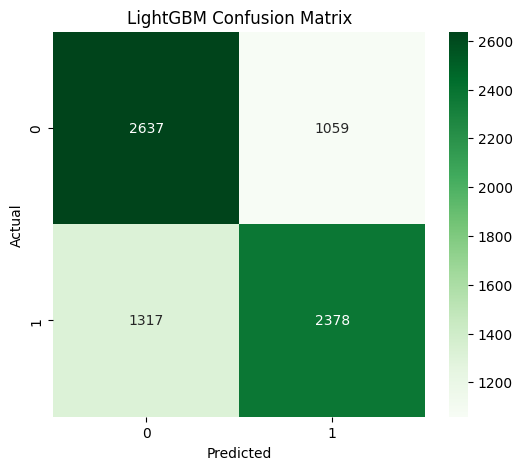

In [57]:
# Step 1: Load dataset
import pandas as pd
data = pd.read_csv('/Users/naniankala/Desktop/engine_data.csv')

# Step 2: Imports
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

# Step 3: Features and target
X = data.drop(["Engine Condition"], axis=1)
y = data["Engine Condition"]

# Step 4: Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Step 5: Balance with SMOTE
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_scaled, y)

# Step 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X_res, y_res, test_size=0.3, random_state=42, stratify=y_res
)

# Step 7: LightGBM model
lgb_model = lgb.LGBMClassifier(
    boosting_type="gbdt",
    n_estimators=500,
    learning_rate=0.05,
    feature_fraction=0.8,
    bagging_fraction=0.8,
    bagging_freq=1,
    max_depth=-1,
    class_weight="balanced",
    random_state=42,
    n_jobs=-1
)


lgb_model.fit(X_train, y_train)
y_pred = lgb_model.predict(X_test)

# Step 8: Evaluation
print("LightGBM Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Step 9: Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("LightGBM Confusion Matrix")
plt.show()
